In [1]:
import numpy as np
import matplotlib.pyplot as plt

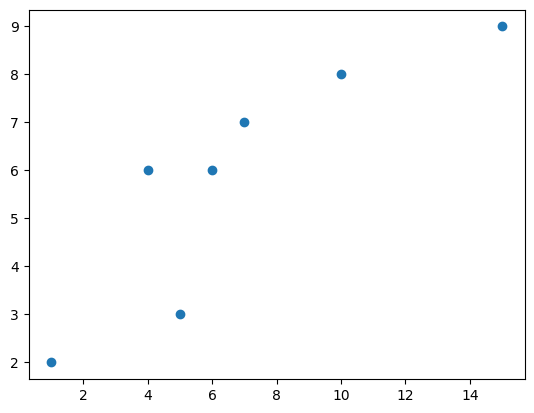

In [2]:
x=[1,4,5,6,7,10,15]
y=[2,6,3,6,7,8,9]

plt.scatter(x,y)
plt.show()

In [3]:
def f(t): #activation
    return np.tanh(t)

def forward(x,w1,w2,b):
    z1=w1*x
    z2=f(z1+b)
    y_hat=w2*z2
    return y_hat,z1,z2

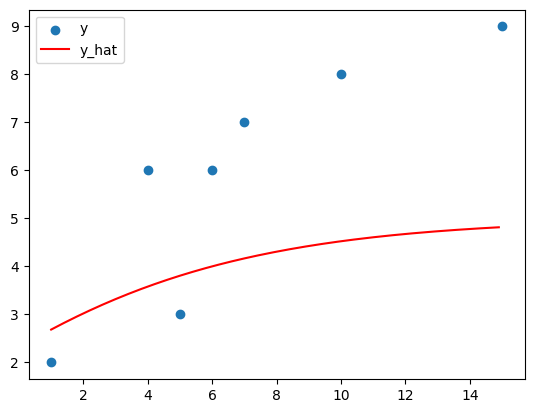

In [4]:
w1,w2,b=0.1,5,0.5
x_vector=np.arange(np.min(x),np.max(x),0.1).tolist()
y_hat_vector=[forward(x_i,w1,w2,b)[0] for x_i in x_vector]

plt.scatter(x,y)
plt.plot(x_vector,y_hat_vector,c='r')
plt.legend(['y','y_hat'])
plt.show()

In [26]:
def calc_loss(y_hat,y):
    return 0.5*(y-y_hat)**2

def dloss(y_hat,y):
    return y_hat-y

def df(t): #derivative of tanh
    return 1-np.tanh(t)**2

def noise(insensity):
    return np.random.normal(0,insensity)



Epoch 0 loss: 19.61987666531501


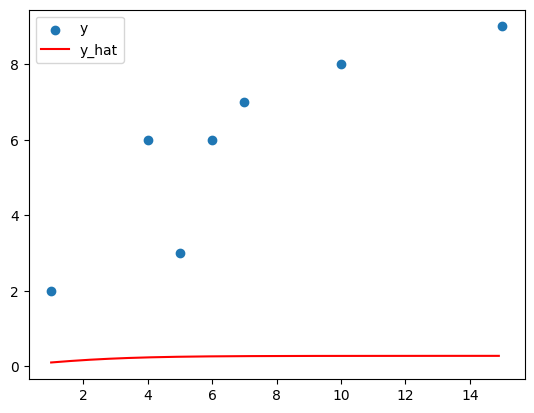



Epoch 20 loss: 3.1993573292788895


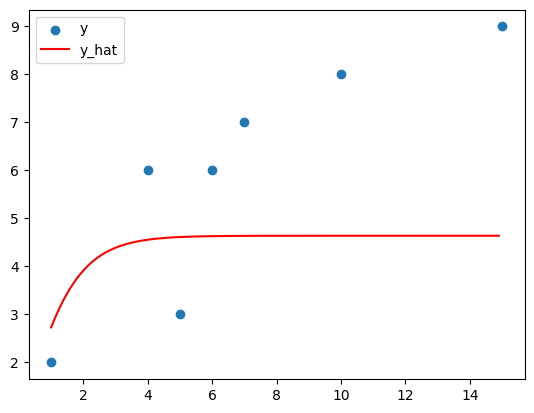



Epoch 40 loss: 1.6165122506347787


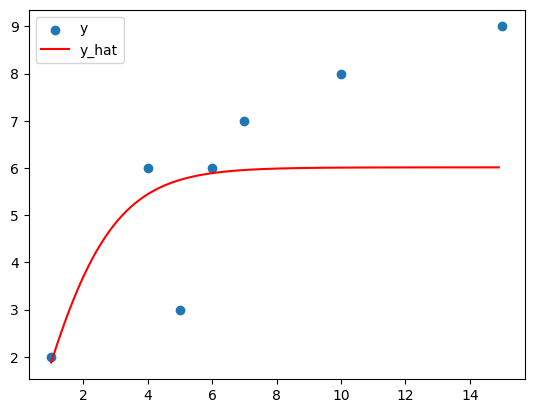



Epoch 60 loss: 1.3571161708921435


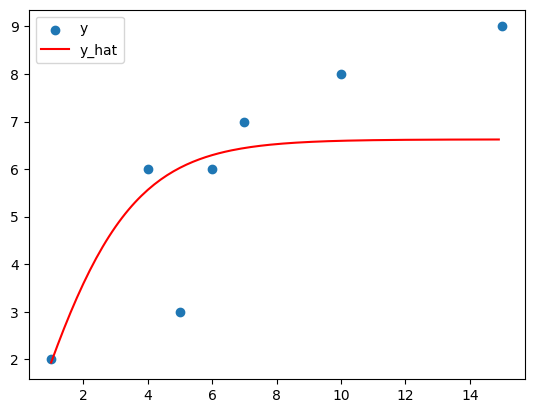



Epoch 80 loss: 1.2955279756645859


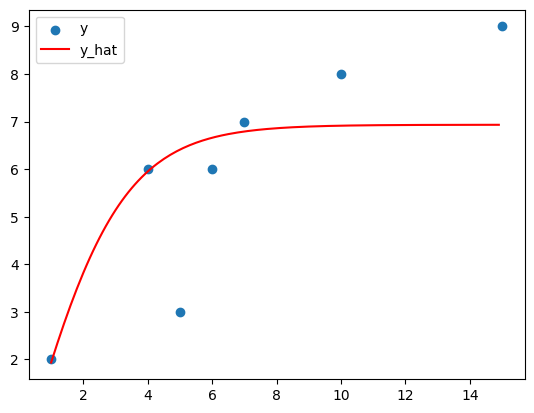



Epoch 100 loss: 1.3028220091876055


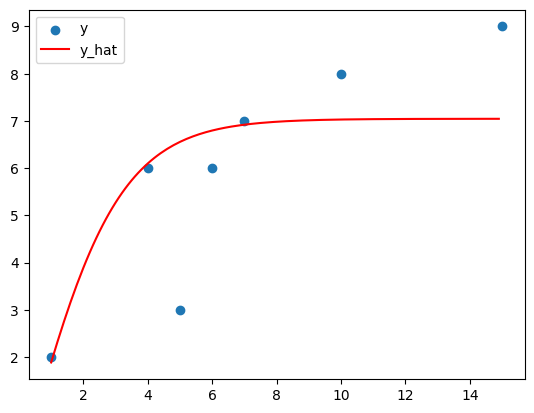



Epoch 120 loss: 1.317984139503696


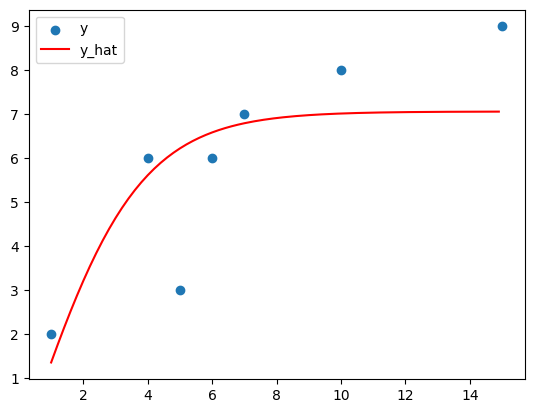



Epoch 140 loss: 1.3217242243311382


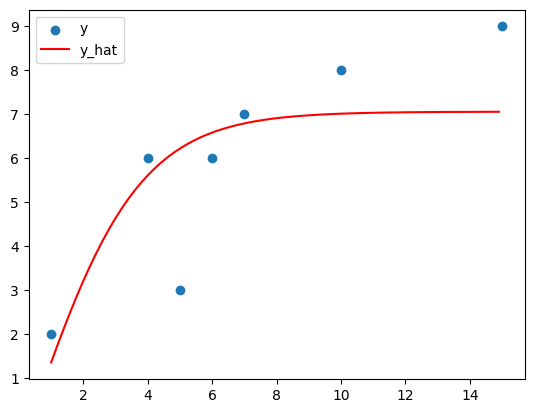



Epoch 160 loss: 1.3217980348802232


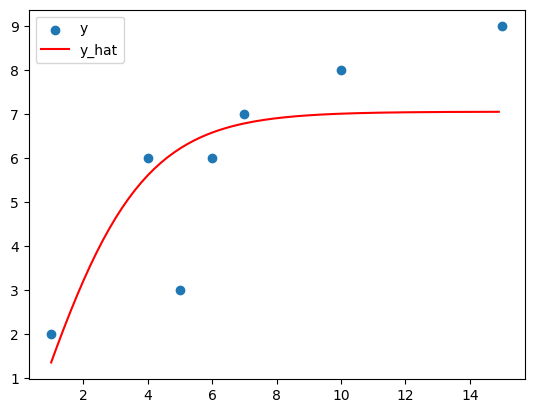



Epoch 180 loss: 1.321803680393369


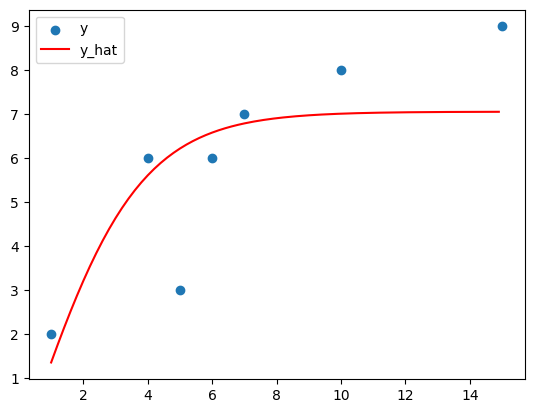

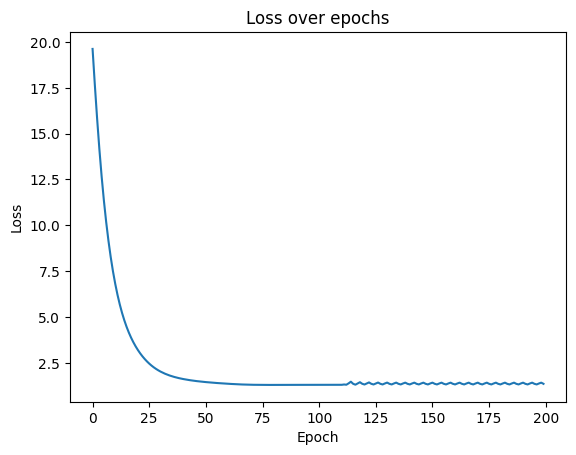

In [27]:
n_epochs=200
lr=1e-2

w1,w2,b=0.3,-0.1,0.1
loss_register=[]

for epoch in range(n_epochs):
    avg_loss=0
    for x_i,y_i in zip(x,y): #stochastic gradient descent
        y_hat,z1,z2=forward(x_i,w1,w2,b)
        loss=calc_loss(y_hat,y_i)

        dldy=dloss(y_hat,y_i)

        dydz2=w2
        dydw2=z2

        dz2dz1=df(z1+b)
        dz2db=df(z1+b)

        dz1dw1=x_i

        dldw2=dldy*dydw2
        dldb=dldy*dydz2*dz2db
        dldw1=dldy*dydz2*dz2dz1*dz1dw1

        w1-=lr*dldw1
        w2-=lr*dldw2
        b-=lr*dldb
        avg_loss+=loss/len(x)
    
    if epoch%20==0:
        print(f'\n\nEpoch {epoch} loss: {avg_loss}')
        plt.scatter(x,y)
        y_hat_vector=[forward(x_i,w1,w2,b)[0] for x_i in x_vector]
        plt.plot(x_vector,y_hat_vector,c='r')
        plt.legend(['y','y_hat'])
        plt.show()

    loss_register.append(avg_loss)

plt.plot(loss_register)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
class Neuron:
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.b=np.random.randn()
        self.lr=1e-2

    
    def forward(self,x):
        z1=self.w1*x
        z2=f(z1+self.b)
        y_hat=self.w2*z2
        self.cache=(x,z1,z2)
        return y_hat

    def backward(self,y_hat,y):
        x,z1,z2=self.cache

        dldy=dloss(y_hat,y)

        dydz2=self.w2
        dydw2=z2

        dz2dz1=df(z1+self.b)
        dz2db=df(z1+self.b)

        dz1dw1=x

        dldw2=dldy*dydw2
        dldb=dldy*dydz2*dz2db
        dldw1=dldy*dydz2*dz2dz1*dz1dw1

        self.w1-=self.lr*dldw1
        self.w2-=self.lr*dldw2
        self.b-=self.lr*dldb



Epoch 0 loss: 22.824589758358748


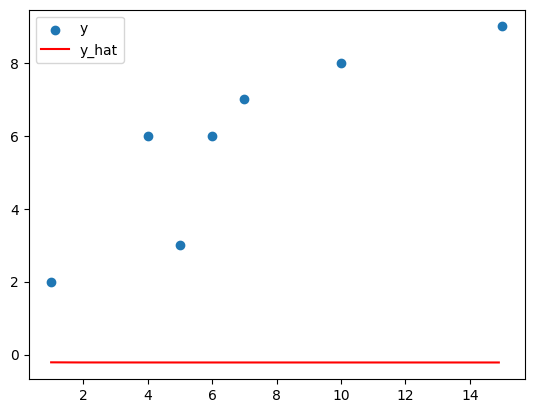



Epoch 20 loss: 3.9146543899775588


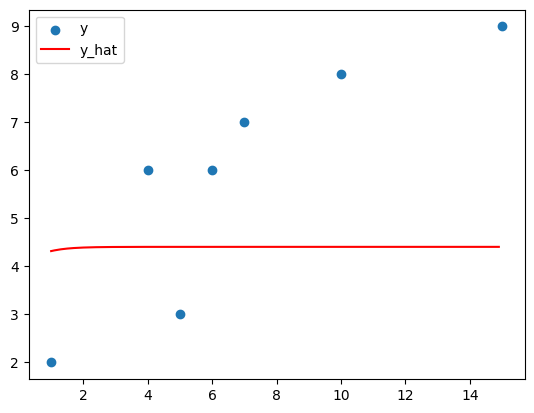



Epoch 40 loss: 2.7536653044099597


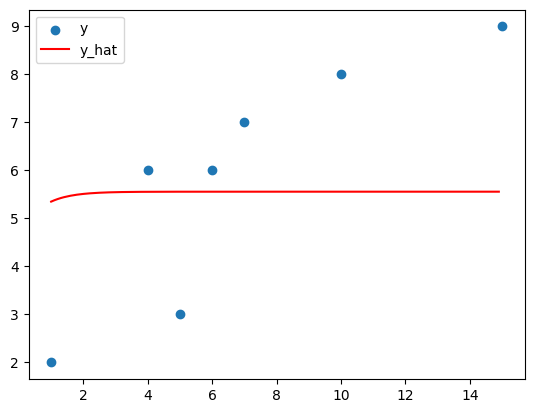



Epoch 60 loss: 2.014990923592078


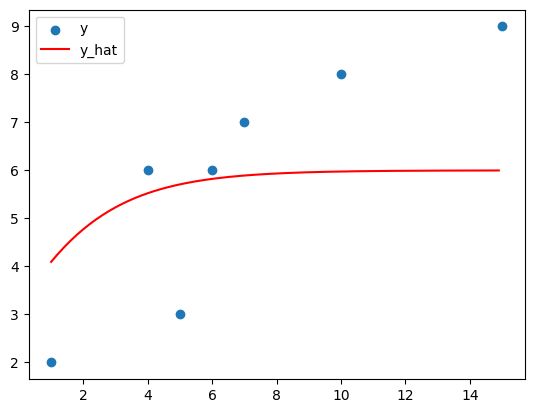



Epoch 80 loss: 1.3580379973058812


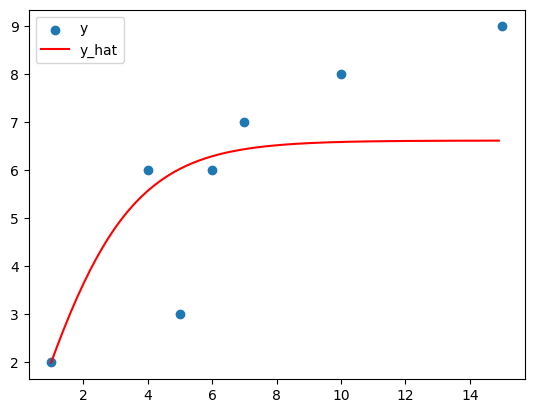



Epoch 100 loss: 1.2955278779043957


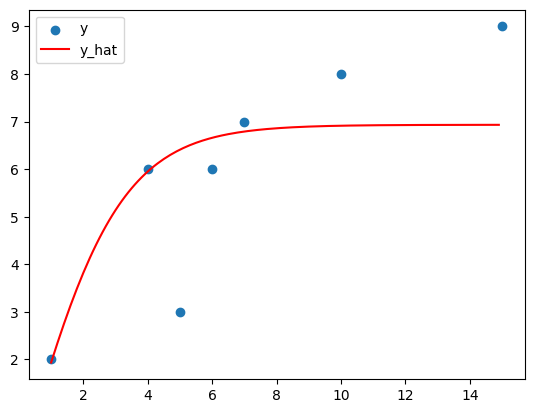



Epoch 120 loss: 1.3027963296152427


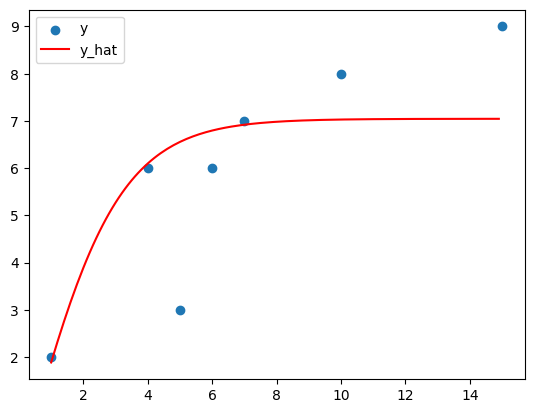



Epoch 140 loss: 1.3966669994146843


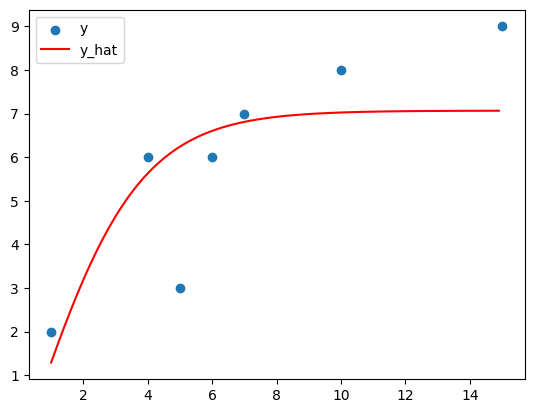



Epoch 160 loss: 1.4257910781042145


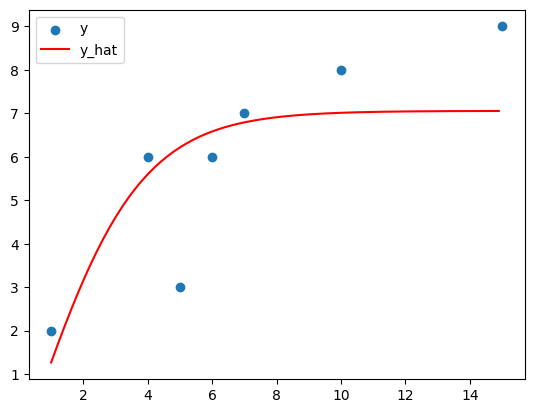



Epoch 180 loss: 1.4201003761123492


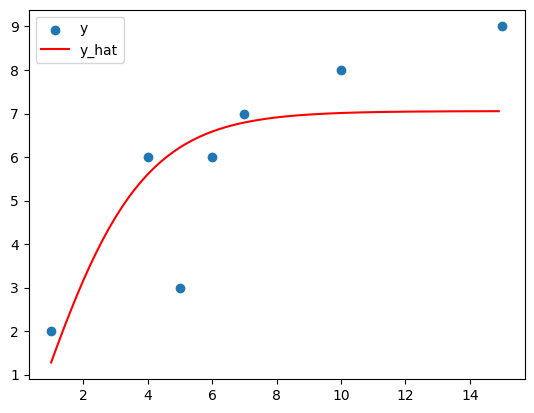



Epoch 200 loss: 1.4192950405973093


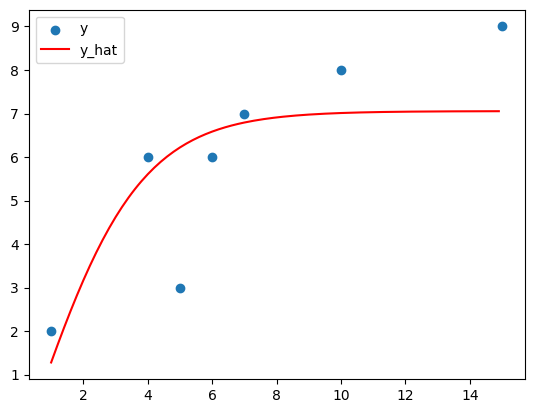

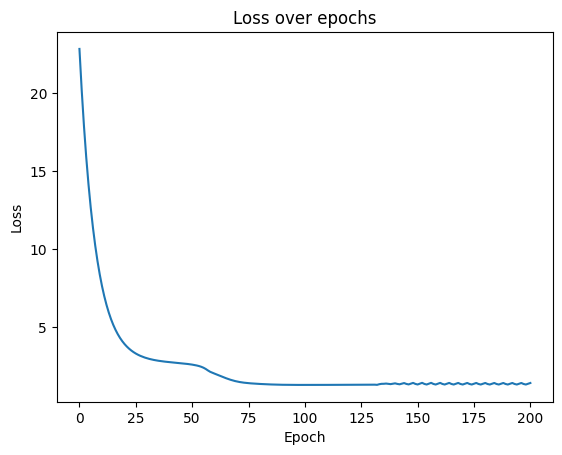

In [33]:
neu=Neuron()

n_epochs=200
loss_register=[]

for epoch in range(n_epochs+1):
    avg_loss=0
    for x_i,y_i in zip(x,y):
        y_hat=neu.forward(x_i)
        loss=calc_loss(y_hat,y_i)
        neu.backward(y_hat,y_i)
        avg_loss+=loss/len(x)
    
    if epoch%20==0:
        print(f'\n\nEpoch {epoch} loss: {avg_loss}')
        plt.scatter(x,y)
        y_hat_vector=[neu.forward(x_i) for x_i in x_vector]
        plt.plot(x_vector,y_hat_vector,c='r')
        plt.legend(['y','y_hat'])
        plt.show()

    loss_register.append(avg_loss)

plt.plot(loss_register)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()